In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCFP10

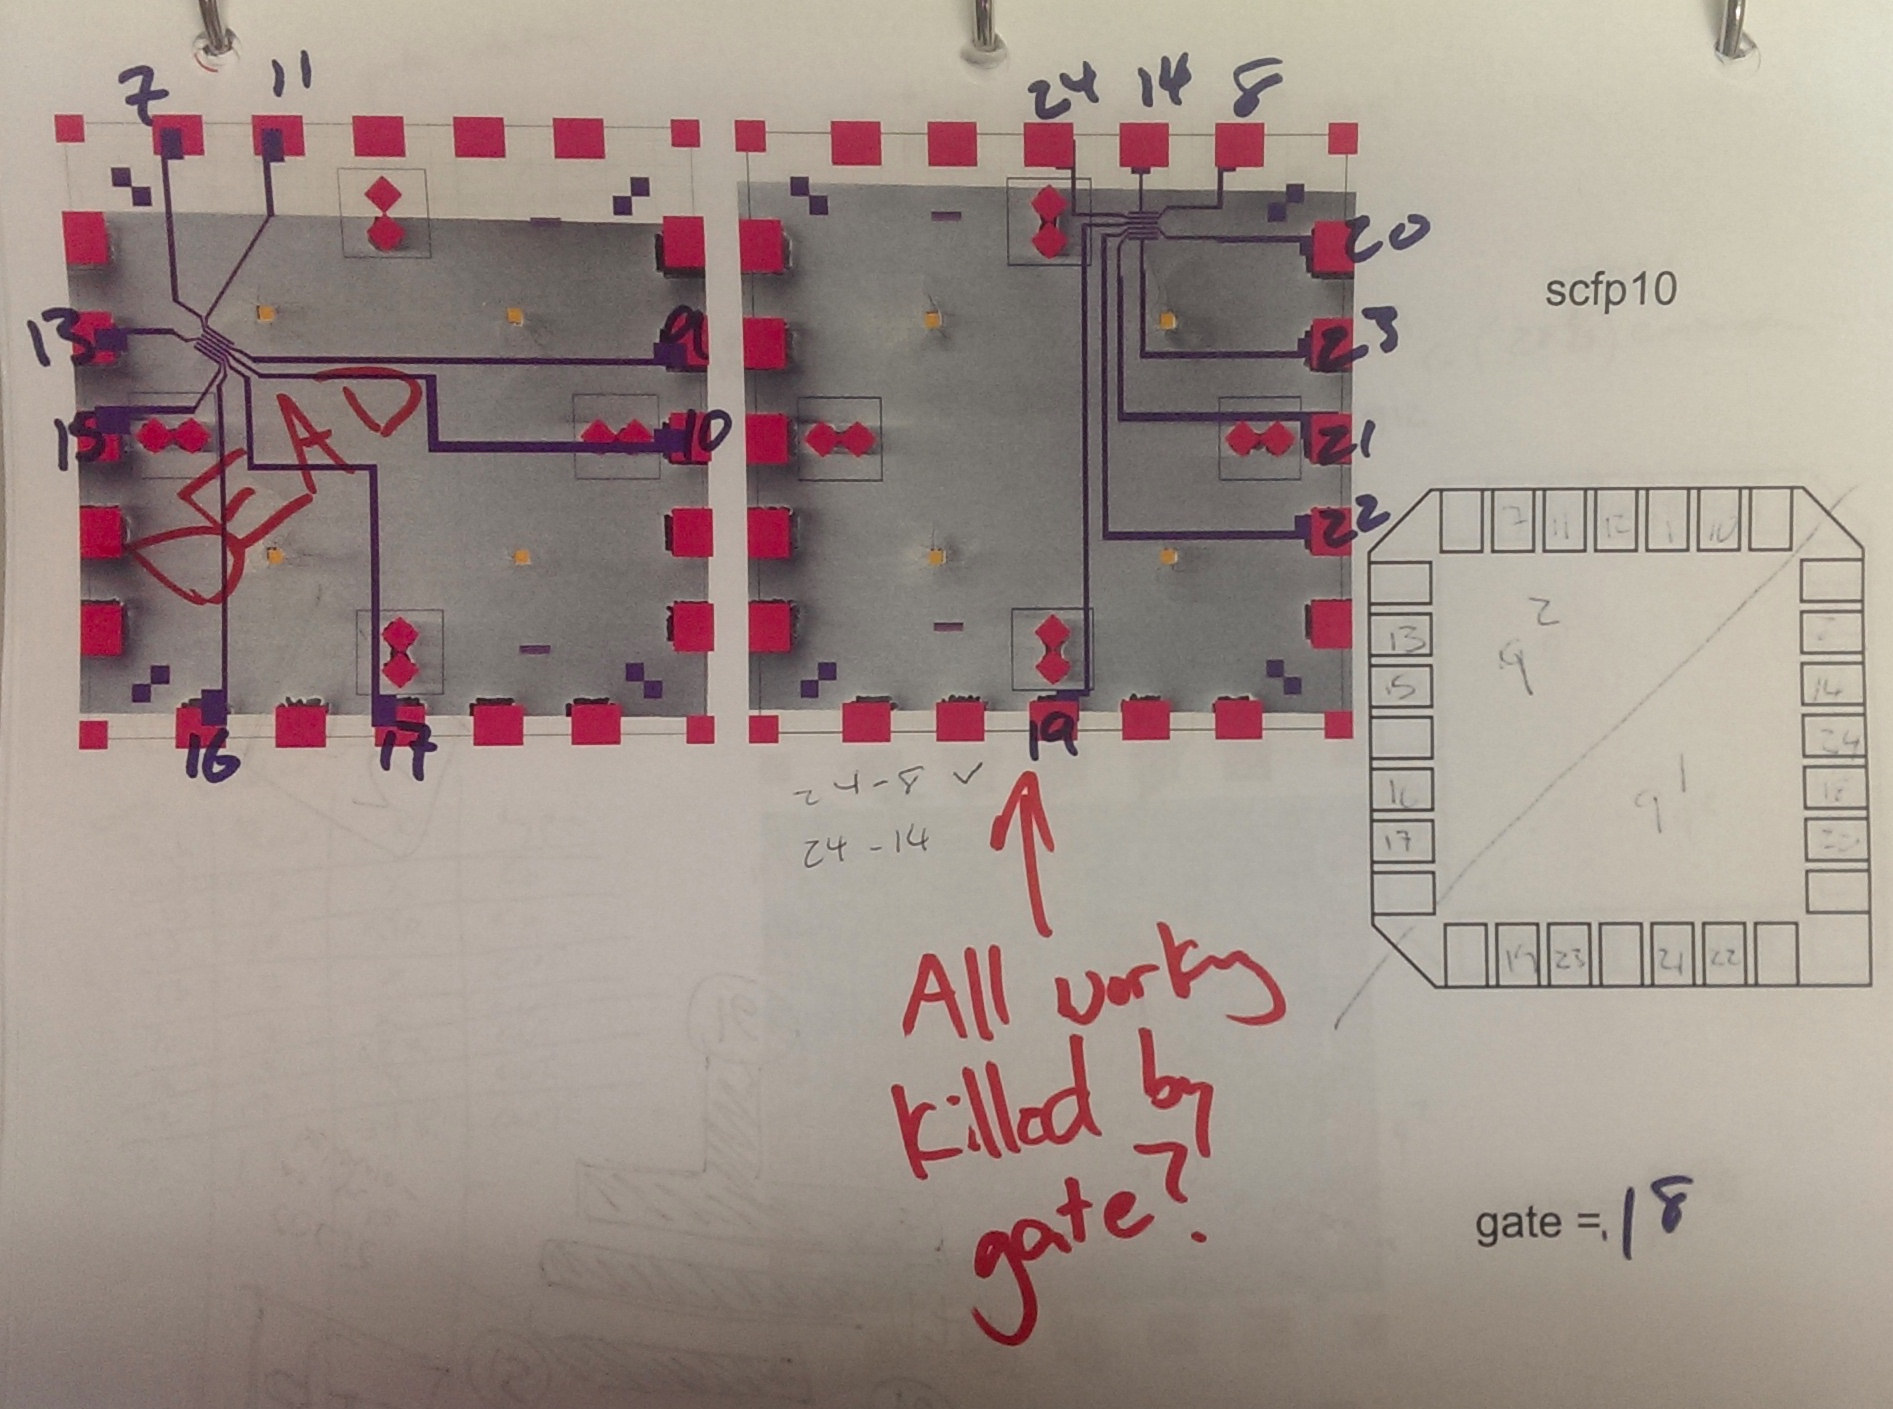

In [2]:
from IPython.display import Image, display

fig_dir = '/Volumes/EDDropbox/Data/SCFP10/figures/'
display(Image(filename=os.path.join(fig_dir,'scfp10.jpg')))

## 24-14

#### Cooldown

In [24]:
data_dir = '/Volumes/EDDropbox/Data/SCFP10/dunker_cooldown/'
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*.bin'))):
    print '\'{0}\''.format(f.split('/')[-1])

'rt-4K_24-14_a.bin'


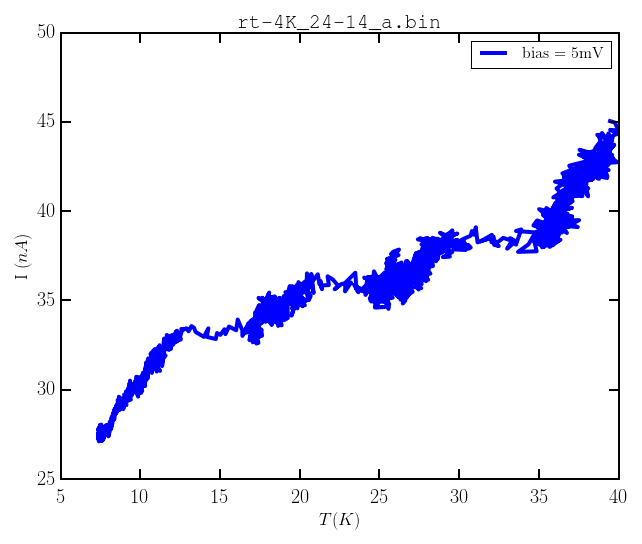

In [25]:
f = os.path.join(data_dir, 'rt-4K_24-14_a.bin')
df = lvdt.get_data_2d(f)
head = lvdt.get_txt(f)

df = df[df['T']<40.0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['T'], df['Iavg']*1e9, label='bias = 5mV')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
ax.set_xlabel(r'$T (K)$')
ax.set_ylabel(r'I $(nA)$')
ax.legend(fontsize = 16)

In [28]:
data_dir = '/Volumes/EDDropbox/Data/SCFP10/4K/'
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*24-14*.bin'))):
    print '\'{0}\''.format(f.split('/')[-1])

'gate-swp_24-14_a.bin'
'VI-gate-swp_24-14_a.bin'
'gate-swp_24-14_b.bin'
'gate-swp_24-14_i.bin'
'VI-gate-swp_24-14_b.bin'
'gate-swp_24-14_c.bin'
'gate-swp_24-14_e.bin'
'gate-swp_24-14_d.bin'
'gate-swp_24-14_g.bin'
'gate-swp_24-14_h.bin'
'gate-swp_24-14_f.bin'


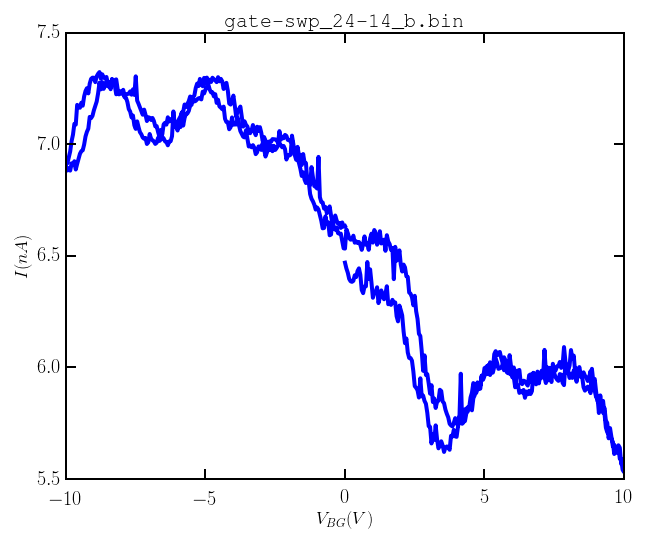

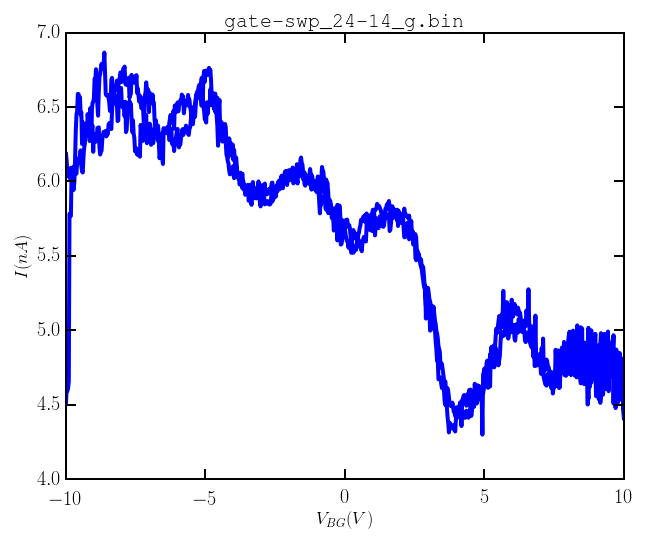

In [33]:
# look at just the good gate data

filelist = ['gate-swp_24-14_b.bin', 'gate-swp_24-14_g.bin']
filelist = [os.path.join(data_dir, f) for f in filelist]

for f in filelist:
    data = np.fromfile(f, '>d')
    data = data.reshape((-1, data[0]))
    gate = data[:,1]
    current = data[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(gate, current*1e9)
    ax.set_xlabel(r'$V_{BG} (V)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

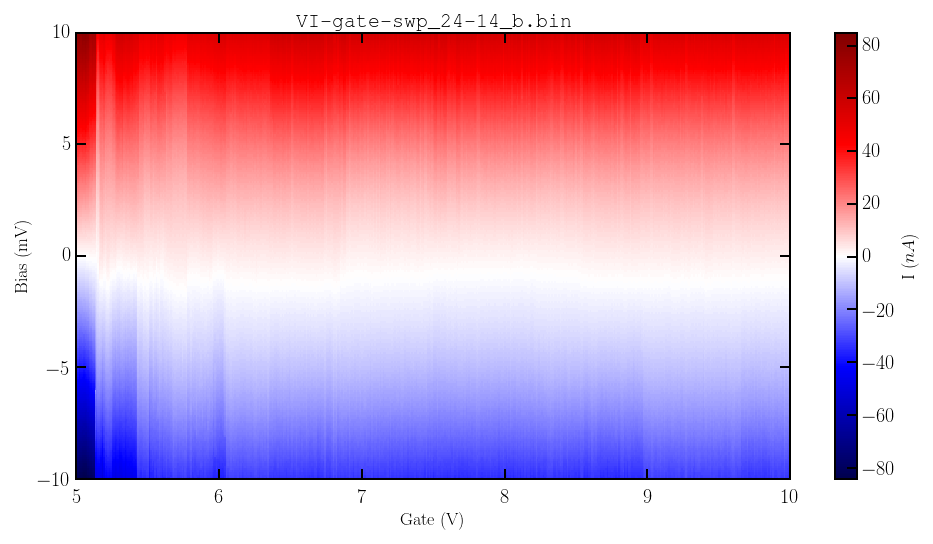

In [52]:
# now look at the bias/gate sweeps

f = os.path.join(data_dir, 'VI-gate-swp_24-14_b.bin')

df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
limits = lvdt.df_extent(df)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic, #vmin = -0.6, vmax = 1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
#cb.set_label(r'$G (\frac{e^2}{h})$')
cb.set_label('I $(nA)$')

### 24-19

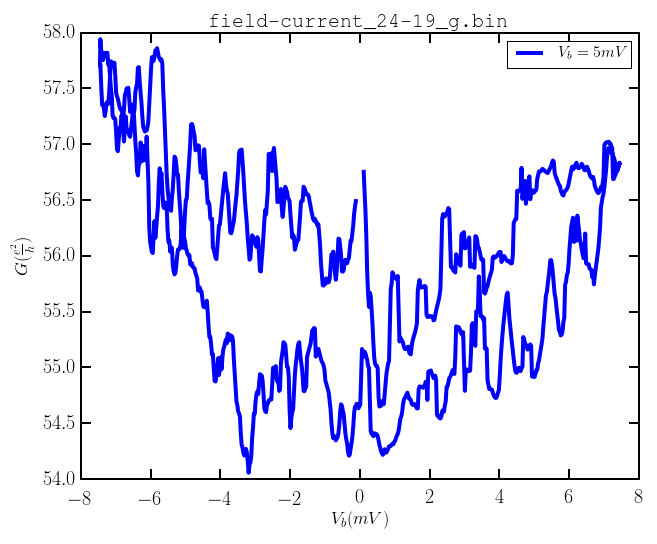

In [60]:
# current vs field

f = os.path.join(data_dir, 'field-current_24-19_g.bin')
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df, 10)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Field'], df['Iavg']*1e9, label = r'$V_b=5mV$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
ax.set_xlabel(r'$V_b (mV)$')
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.legend(fontsize=16)

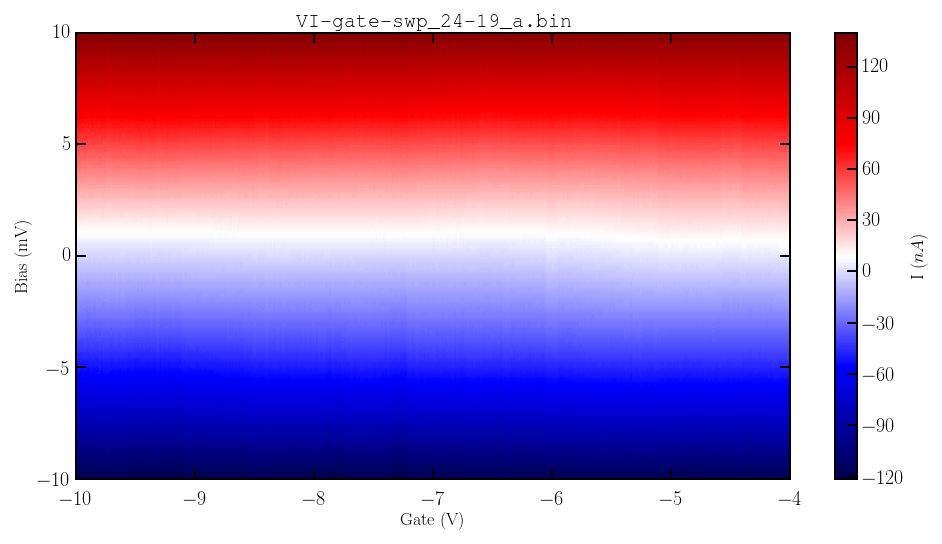

In [63]:
# bias/gate sweep
f = os.path.join(data_dir, 'VI-gate-swp_24-19_a.bin')

df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
limits = lvdt.df_extent(df)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic, #vmin = -0.6, vmax = 1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
#cb.set_label(r'$G (\frac{e^2}{h})$')
cb.set_label('I $(nA)$')

In [64]:
for h in lvdt.get_txt(f):
    print h

['VI_DAQIO.vi', '']
['Voltage Input Setup', ' ']
['Samples to Read', ' 7.50000E+2']
['Input Channel 1', ' Dev1/ai0']
['Sample Rate', ' 3.00000E+3']
['Input Minimum Value', ' -5.00000E+0']
['Input Maximum Value', ' 5.00000E+0']
['Terminal Configuration', ' Differential']
['Name', ' Measure']
['Sample Mode', ' Finite Samples']
['', '']
['Gate Sweep', ' ']
['Start (V)', ' -1.00000E+1']
['Stop (V)', ' -4.00000E+0']
['Step (V)', ' 1.00000E-2']
['Divider', ' 9.85000E+0']
['Physical Channel', ' Dev1/ao1']
['Name', ' Gate']
['Minimum Value', ' -1.00000E+1']
['Maximum Value', ' 1.00000E+1']
['Sweep Type', ' One Way']
['', '']
['Bias Sweep', ' ']
['Start (V)', ' 0.00000E+0']
['Stop (V)', ' 1.00000E-2']
['Step (V)', ' 1.00000E-4']
['Divider', ' 1.00000E-3']
['Physical Channel', ' Dev1/ao0']
['Name', ' Bias']
['Minimum Value', ' -1.00000E+1']
['Maximum Value', ' 1.00000E+1']
['Sweep Type', ' Symmetric About Start']
['', '']
['Other', ' ']
['Current Amp', ' -1.00000E-7']
['Bias Delay (s)', ' 2.5000

Despite what the data looks like, the log file says the gate was connected correctly.